In [14]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from matplotlib import pyplot as plt
from PIL import Image
import os
import numpy as np

In [15]:
%matplotlib inline


## Load model

In [16]:
PATH_TO_CKPT = '/opt/tensorflow-models-object_detection/ssd_mobilenet_v1_coco_11_06_2017/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
PATH_TO_LABELS = '/opt/tensorflow-models/object_detection/data/mscoco_label_map.pbtxt'
NUM_CLASSES = 90

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [17]:

category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

## Inference

In [18]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [19]:
def detect_image(image, figsize=(12, 8)):
    '''Plots the object detection result for a given image.'''
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
    boxes = np.squeeze(boxes)
    classes = np.squeeze(classes).astype(np.int32)
    scores = np.squeeze(scores)
    for box, cls, score in zip(boxes, classes, scores):
        if score > 0.5:
            print(category_index[cls], score, box)


    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          boxes,
          classes,
          scores,
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
    plt.figure(figsize=figsize)
    plt.imshow(image_np)
    plt.show()

### Inference on test image files

test_images/carrot-kale-walnuts-tomatoes.jpeg
{'name': 'carrot', 'id': 57} 0.81074 [ 0.43724433  0.14625946  0.8684355   0.48494461]
{'name': 'carrot', 'id': 57} 0.759139 [ 0.61312437  0.72372735  0.75827706  0.94853508]
{'name': 'broccoli', 'id': 56} 0.680788 [ 0.07528856  0.163885    0.3484771   0.50683773]
{'name': 'carrot', 'id': 57} 0.587136 [ 0.34789789  0.18355677  0.78026998  0.47831568]


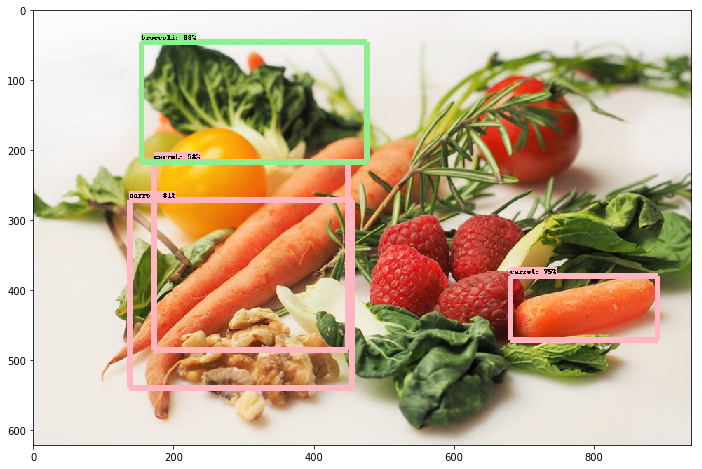

test_images/pexels-photo-297755.jpeg
{'name': 'laptop', 'id': 73} 0.975347 [ 0.40262461  0.06146468  0.91263199  0.40659636]


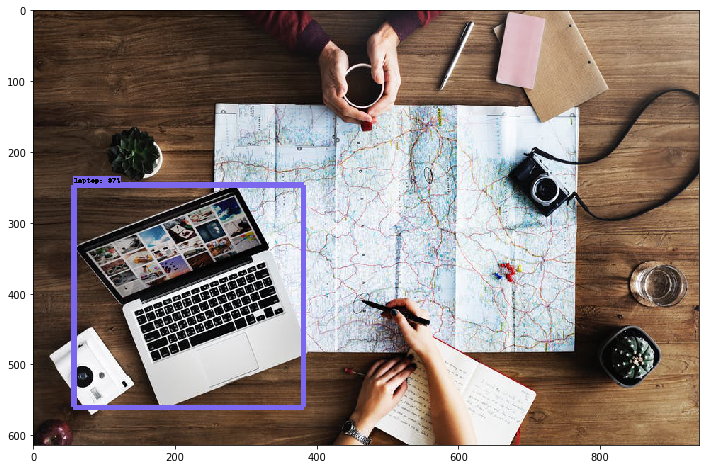

test_images/pexels-photo-342214.jpeg
{'name': 'dog', 'id': 18} 0.683393 [ 0.18936726  0.01154175  0.99057984  0.70747077]


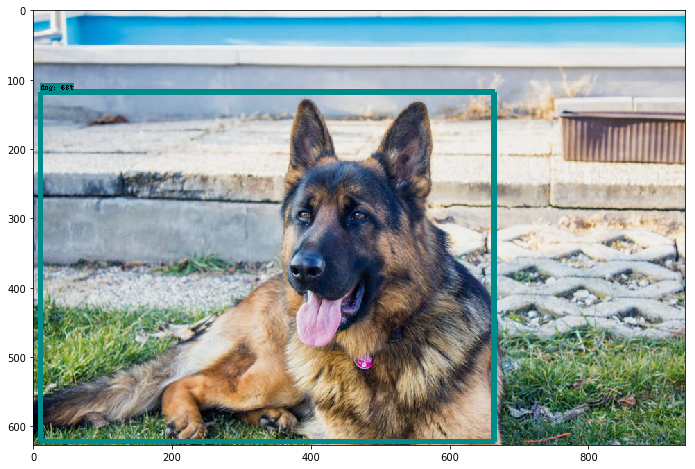

In [25]:
PATH_TO_TEST_IMAGES_DIR = 'test_images/'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, f) for f in os.listdir(PATH_TO_TEST_IMAGES_DIR) if f.endswith('.jpeg') ]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            print(image_path)
            image = Image.open(image_path)
            detect_image(image)

### Inference on a random cat image

{'name': 'cat', 'id': 17} 0.9163 [ 0.21318707  0.34670439  0.98983943  1.        ]


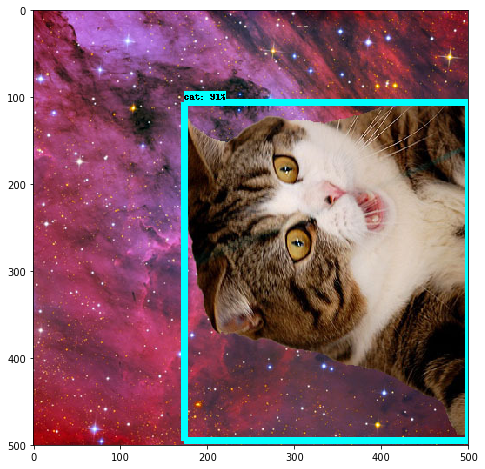

In [13]:
import requests
from io import BytesIO
url = 'http://thecatapi.com/api/images/get?format=src&type=jpg'

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        r = requests.get(url)
        image = Image.open(BytesIO(r.content))
        detect_image(image)
